# Final Project - Travel Insurance Prediction

## Exploratory Data Analysis

### Import Library

In [ ]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Data manipulation
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Warning
import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import sidetable as stb

### Load Dataset

In [ ]:
!gdown --id 1Hrzb8-td5D0P4GLks3QBtzkCUzpszzP3

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Hrzb8-td5D0P4GLks3QBtzkCUzpszzP3
To: /content/TravelInsurancePrediction.csv
100% 115k/115k [00:00<00:00, 71.5MB/s]


In [ ]:
df = pd.read_csv('/content/TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


### Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Tipe data pada setiap kolom sudah sesuai, nama kolom dengan isi datanya sudah sesuai namun pada salah satu kolom yang ada perlu dilakukan beberapa penyesuaian

In [ ]:
#checking missing value
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
#mencari unique value
print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} -> {df[i].nunique()}')

columns and number of unique values
Unnamed: 0 -> 1987
Age -> 11
Employment Type -> 2
GraduateOrNot -> 2
AnnualIncome -> 30
FamilyMembers -> 8
ChronicDiseases -> 2
FrequentFlyer -> 2
EverTravelledAbroad -> 2
TravelInsurance -> 2


In [ ]:
#Apa saja unique valuesnya
for i in df.columns:
    print(i,"column's unique values are:",df[i].unique())

Unnamed: 0 column's unique values are: [   0    1    2 ... 1984 1985 1986]
Age column's unique values are: [31 34 28 25 33 26 32 29 35 30 27]
Employment Type column's unique values are: ['Government Sector' 'Private Sector/Self Employed']
GraduateOrNot column's unique values are: ['Yes' 'No']
AnnualIncome column's unique values are: [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
FamilyMembers column's unique values are: [6 7 4 3 8 9 5 2]
ChronicDiseases column's unique values are: [1 0]
FrequentFlyer column's unique values are: ['No' 'Yes']
EverTravelledAbroad column's unique values are: ['No' 'Yes']
TravelInsurance column's unique values are: [0 1]


Hasil:

Tidak ada data yang memiliki nilai null
Semua tipe data sudah sesuai, namun perlu penyesuaian pada EDA dan Pre-Processing untuk Modelling
Nilai unik pada kolom juga tidak memiliki suatu kejanggalan

In [ ]:
# Drop kolom 'Unnamed:0'
df = df.drop('Unnamed: 0' , axis = 1) 
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [ ]:
# Remapping kolom yang bernilai 0 dan 1 akan diubah menjadi yes untuk 1 dan no untuk 0

df["TravelInsurance"] = df["TravelInsurance"].map({0: "No", 1: "Yes"})
df["ChronicDiseases"] = df["ChronicDiseases"].map({0: "No", 1: "Yes"})

In [ ]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,Yes
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   object
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   object
dtypes: int64(3), object(6)
memory usage: 139.8+ KB


In [ ]:
df.describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


In [ ]:
df.describe(include = ['object'])

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987,1987,1987,1987,1987,1987
unique,2,2,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No,No,No
freq,1417,1692,1435,1570,1607,1277


Secara keseluruhan tidak ada variable yang memiliki anomali maupun dominasi yang berlebih di antara tiap unique nilai terhadap analisa descriptive statistiknya.

In [ ]:
#separating categorical and numerical column
num = df.select_dtypes(include=[np.number])
cat = df.select_dtypes(exclude=[np.number])

numerical = num.columns
categorical = cat.columns

print(numerical)
print(categorical)

Index(['Age', 'AnnualIncome', 'FamilyMembers'], dtype='object')
Index(['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')


In [ ]:
df[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0


Catatan

ketiga kolom (Age, Annual Income, Family Members) memiliki persebaran data yang sama.
seluruh kolom tidak memiliki perbedaan yang signifikan antara mean/median dengan max.

In [ ]:
df[categorical].describe()

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987,1987,1987,1987,1987,1987
unique,2,2,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No,No,No
freq,1417,1692,1435,1570,1607,1277


In [ ]:
df[numerical].mode()

,Age,AnnualIncome,FamilyMembers
0,28,800000,4


Dari informasi diatas, diperoleh :

usia client yang paling banyak yaitu berada pada usia 28 tahun
Annual Income terbanyak berjumlah $800000
Jumlah Family members yang sering muncul adalah 4

In [ ]:
for col in numerical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Age:
28    506
34    266
31    234
29    192
33    148
26    148
25    146
27    131
32     91
30     65
35     60
Name: Age, dtype: int64

Value count kolom AnnualIncome:
800000     153
500000     143
1400000    130
1200000    112
1100000    107
600000      98
700000      95
1300000     91
300000      88
1500000     82
1050000     82
550000      81
1150000     79
900000      72
1250000     71
750000      65
400000      65
1000000     60
350000      55
850000      55
1350000     43
1700000     37
1450000     31
650000      30
950000      21
1750000     15
450000      15
1550000      5
1800000      4
1650000      2
Name: AnnualIncome, dtype: int64

Value count kolom FamilyMembers:
4    505
5    426
3    377
6    294
7    178
2     93
8     59
9     55
Name: FamilyMembers, dtype: int64



In [ ]:
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Employment Type:
Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

Value count kolom GraduateOrNot:
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64

Value count kolom ChronicDiseases:
No     1435
Yes     552
Name: ChronicDiseases, dtype: int64

Value count kolom FrequentFlyer:
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

Value count kolom EverTravelledAbroad:
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64

Value count kolom TravelInsurance:
No     1277
Yes     710
Name: TravelInsurance, dtype: int64



In [ ]:
df['TravelInsurance'].value_counts(normalize=True)

No     0.642677
Yes    0.357323
Name: TravelInsurance, dtype: float64

fitur target (Travel Insurance) sebagai dasar utk memprediksi pembelian paket travel insurance baru memiliki 2 fitur (yes/no)

### Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target).

Tuliskan hasil observasinya( univariate analysis), misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb).
Jelaskan juga apa yang harus di-follow up saat data pre-processing

#### A. Individual Displot Analysis (Numerical)

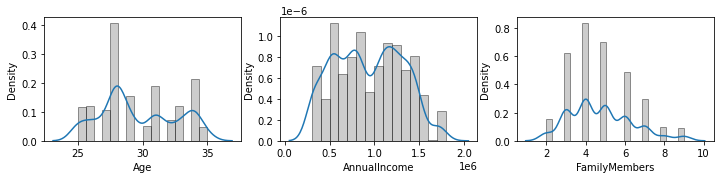

In [ ]:
features = numerical 
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(2, len(features), i+1)
    sns.distplot(df[features[i]],
                 hist_kws={'color' : 'gray', 'edgecolor' : "black"})

In [ ]:
#skewness value 
for i in range(0, len(numerical)): print(f"Skewness {df[numerical].columns[i]} : {df[numerical[i]].skew()}")

Skewness Age : 0.23962475139295264
Skewness AnnualIncome : 0.07841699043593056
Skewness FamilyMembers : 0.5611969123054563


Insight Displot
Dari nilai skewness pada visualisasi data diatas dapat disimpulkan bahwa :

Dari nilai skewness dan visualisasi di atas dapat dikatakan bahwa tipe data numerikal memiliki pola persebaran datanya adalah positif.
Lonjakan pada gambar diatas menunjukkan jumlah yang paling dominan untuk setiap data.

#### B. Individual Boxplot Analysis (Numerical)

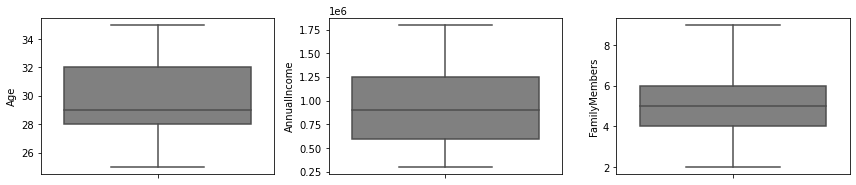

In [ ]:
features = numerical
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(2, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='gray')
    plt.tight_layout()

Insight Boxplot : Pada grafik boxplot, terlihat seluruh fitur tidak memiliki outlier, yaitu nilai ekstrem yang melewati nilai limit tertinggi dan terendah dari suatu fitur.

#### C. Violin Plot (Numerical)

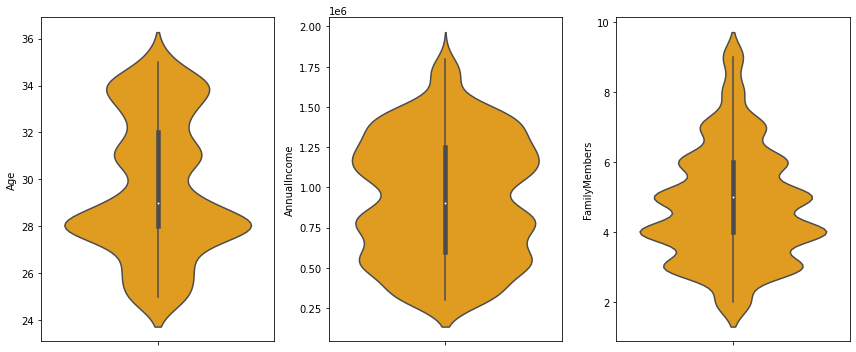

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.violinplot(y=df[numerical[i]], color='orange', orient='v')
    plt.tight_layout()

Insight Violin Plot : seluruh kolom memiliki distribusi yang merata.

#### D. Barplot (Categorical)

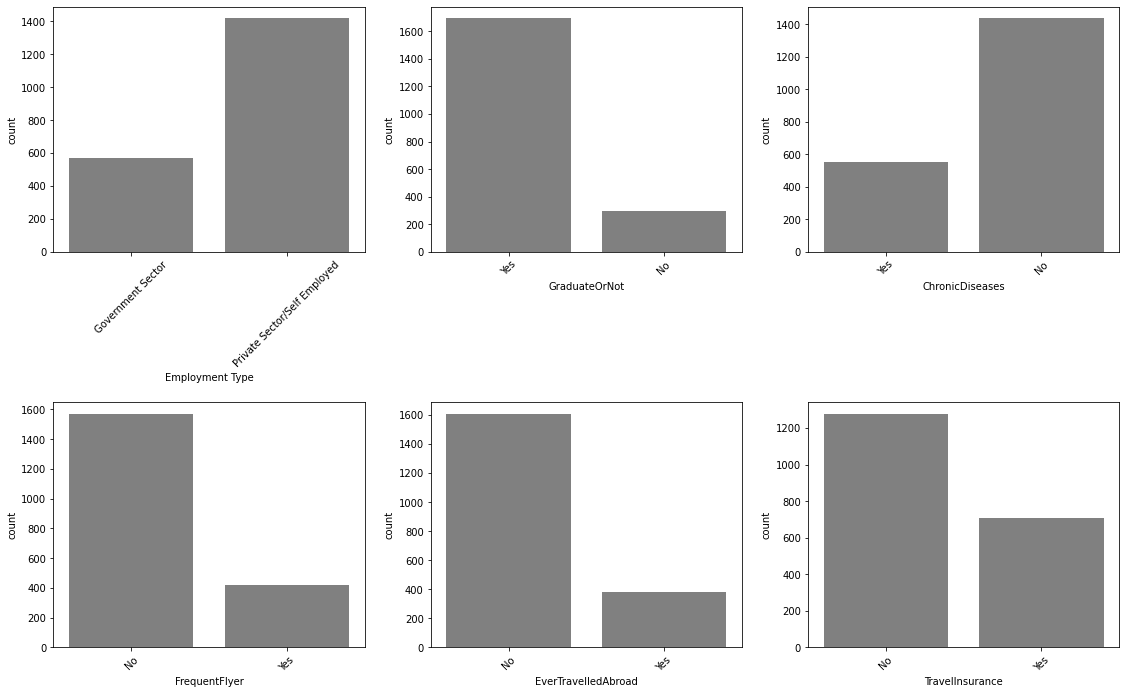

In [ ]:
# Countplot untuk melihat persebaran data variabel categorical 
plt.figure(figsize=(16,10))
for i in range (0, len(categorical[0:])):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[categorical[0:][i]], color='gray', orient='h')
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout(pad=2)

In [ ]:
df.stb.freq(['Employment Type'], cum_cols=False)

,Employment Type,count,percent
0,Private Sector/Self Employed,1417,71.313538
1,Government Sector,570,28.686462


In [ ]:
df.stb.freq(['GraduateOrNot'], cum_cols=False)

,GraduateOrNot,count,percent
0,Yes,1692,85.153498
1,No,295,14.846502


In [ ]:
df.stb.freq(['ChronicDiseases'], cum_cols=False)

,ChronicDiseases,count,percent
0,No,1435,72.219426
1,Yes,552,27.780574


In [ ]:
df.stb.freq(['FrequentFlyer'], cum_cols=False)

,FrequentFlyer,count,percent
0,No,1570,79.013588
1,Yes,417,20.986412


In [ ]:
df.stb.freq(['EverTravelledAbroad'], cum_cols=False)

,EverTravelledAbroad,count,percent
0,No,1607,80.875692
1,Yes,380,19.124308


In [ ]:
df.stb.freq(['TravelInsurance'], cum_cols=False)

,TravelInsurance,count,percent
0,No,1277,64.26774
1,Yes,710,35.73226


Berdasarkan barplot di atas diperoleh kesimpulan keseluruhan data kategorik historikal klien yaitu:

- Klien yang terbanyak berprofesi sebagai private sector employee (71.3%)
- Klien dengan status sudah lulus bangku universitas merupakan klien yang terbanyak (85.1%)
- Klient yang tidak memiliki penyakit kronis (chronic disease) (72.2%) lebih banyak daripada yang memiliki penyakit kronis (27.7%)
- Klien dengan status "Frequent Flyer" lebih sedikit (79.01%)
- Klien yang tidak pernah berpergian ke luar negeri (ever travelled abroad) lebih tinggi (80.8%) dibanding yang pernah berpergian (19.1%)
- Hasil dari penawaran Travel Insurance sebelumnya pada tahap awal yang paling banyak adalah "No" (64.2%)

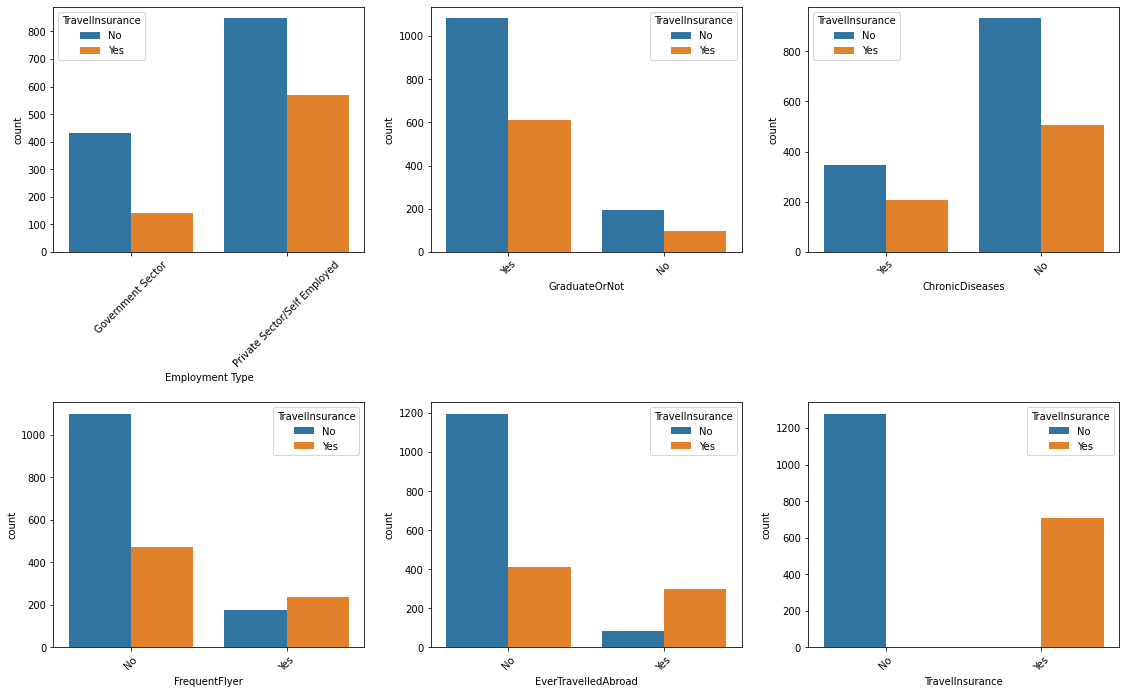

In [ ]:
# Countplot dengan meng-highlight "TravelInsurance" sebagai variabel target
plt.figure(figsize=(16,10))
for i in range (0, len(categorical[0:])):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=df[categorical[0:][i]], hue='TravelInsurance', orient='h')
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout(pad=2)

Yang perlu di follow up : Persebaran pelanggan yang membeli Travel Insurance pada tahap awal masih sangat kecil dibanding pelanggan yang belum membeli Travel Insurance. Perlu dilakukan analisa korelasi antara variable numerikal & kategorikal untuk melihat variabel apa yang mempengaruhi tingkat pembelian selanjutnya.

<Figure size 576x432 with 0 Axes>

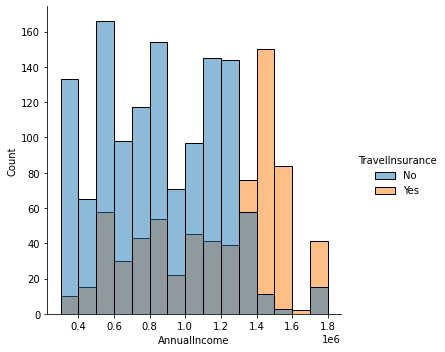

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(data=df, x="AnnualIncome",hue='TravelInsurance')

<AxesSubplot:xlabel='AnnualIncome', ylabel='Density'>

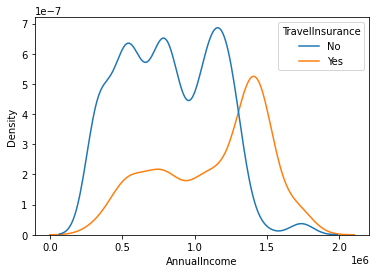

In [ ]:
sns.kdeplot(data=df, x="AnnualIncome",hue='TravelInsurance')

Jika dilihat dari Annual Income diatas 1,3 million, lebih banyak yang membeli travel insurance dibandingkan dengan yang tidak membeli travel insurance.

### Multivariate Analysis

#### A. Correlation Heatmap

<AxesSubplot:>

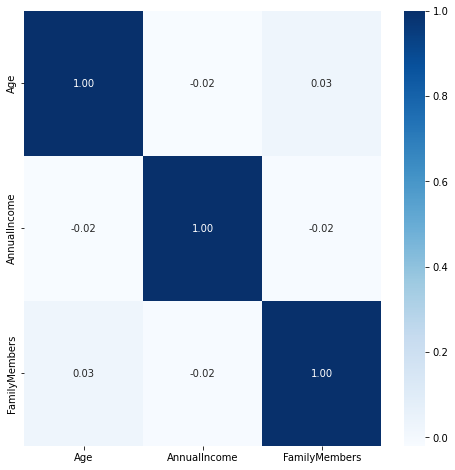

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Terlihat dari heatmap diatas bahwa tidak ada feature yang berkorelasi dengan kuat yang berarti tidak ada feature yang redundant.

#### B. Pairplot

<Figure size 1080x1080 with 0 Axes>

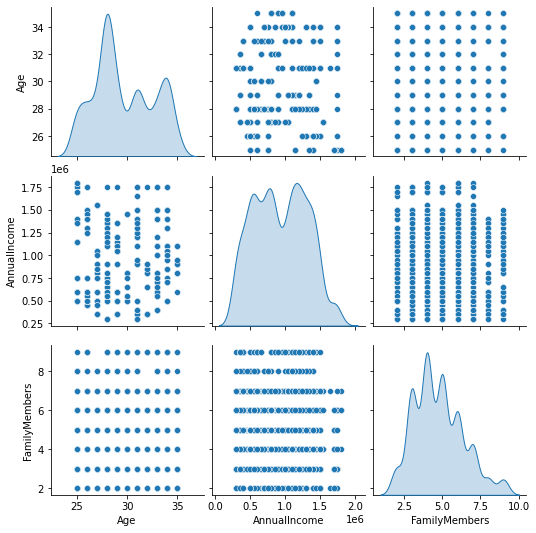

In [ ]:
#Tanpa hue dan regresi
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde')

<Figure size 1080x1080 with 0 Axes>

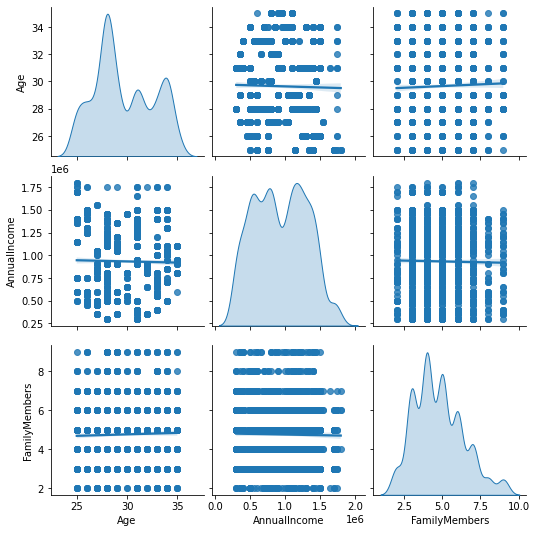

In [ ]:
#Menggunakan plot regresi tanpa hue
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde', kind='reg')

<Figure size 1080x1080 with 0 Axes>

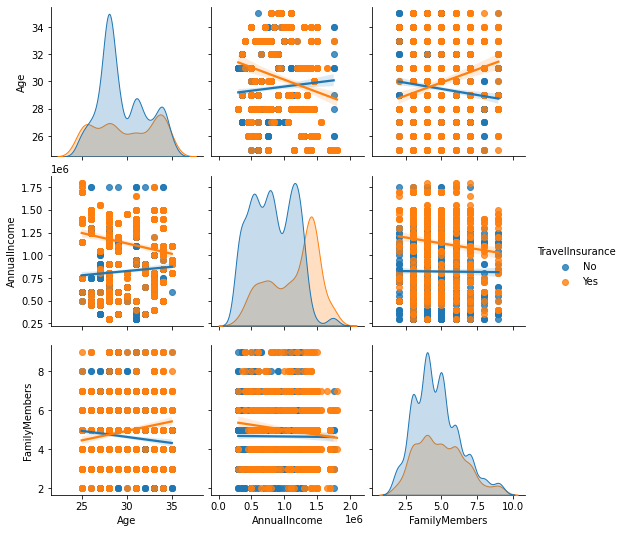

In [ ]:
#Pakai hue dan plot regresi
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde', kind='reg', hue='TravelInsurance')

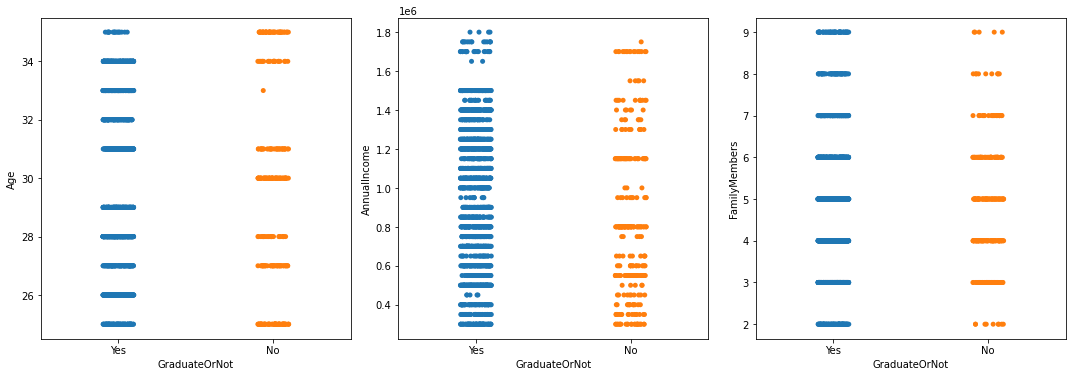

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical)):
  ax = fig.add_subplot(3,3,i+1)
  sns.stripplot(ax=ax, data=df, x='GraduateOrNot', y=numerical[i])
  plt.tight_layout()

Dari grafik di atas dapat dilihat variabel terhadap Graduate or Not, pada variable Age dan Family Member distribusinya tidak terlihat perbedaan yang signifikan.

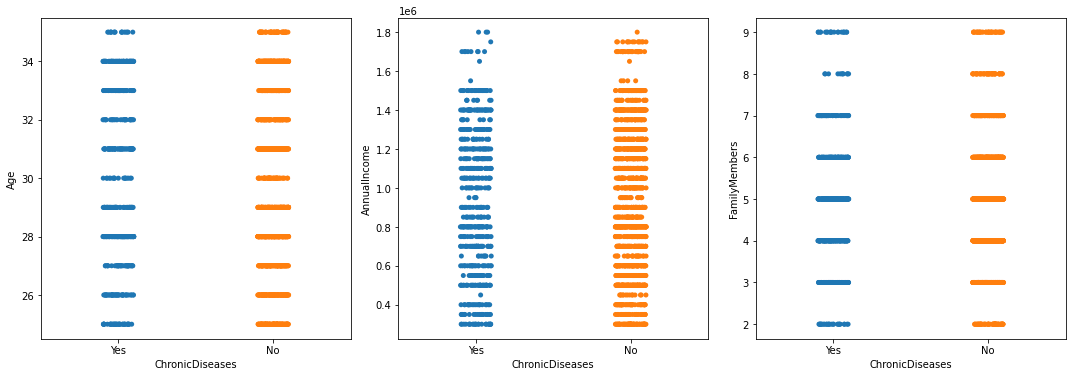

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical)):
  ax = fig.add_subplot(3,3,i+1)
  sns.stripplot(ax=ax, data=df, x='ChronicDiseases', y=numerical[i])
  plt.tight_layout()

Grafik di atas menyatakan variabel terhadap historical client yang memiliki chronic disease dengan variabel Numerical (Age, Annual Income, Family Member). Hasil yang dapat disimpulkan yaitu historical client dengan chronic disease yg cenderung memiliki travel insurance kebanyakan berada pada umur > 26 tahun dan yang terbanyak memiliki annual income berada pada kisaran >= 1.4 serta kebanyakan lebih dari 2 orang anggota keluarga.

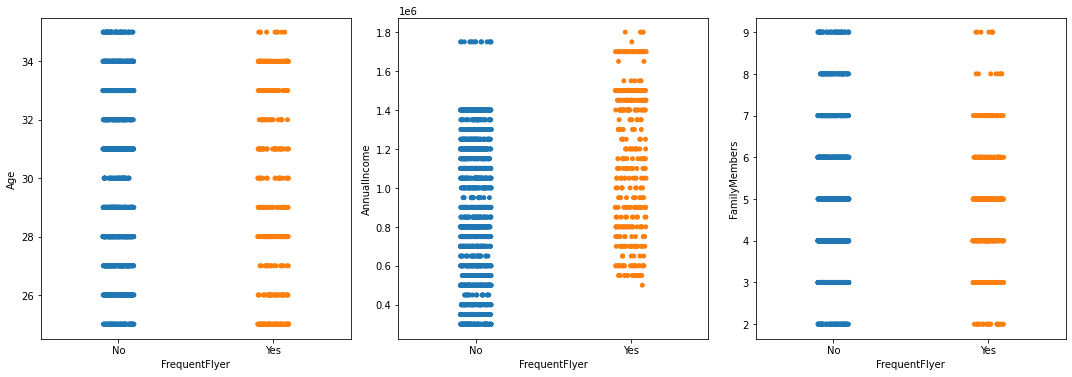

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical)):
  ax = fig.add_subplot(3,3,i+1)
  sns.stripplot(ax=ax, data=df, x='FrequentFlyer', y=numerical[i])
  plt.tight_layout()

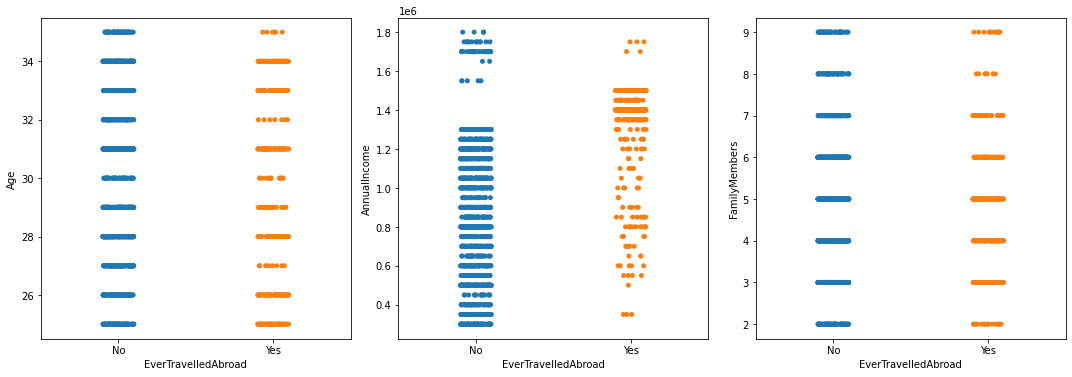

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical)):
  ax = fig.add_subplot(3,3,i+1)
  sns.stripplot(ax=ax, data=df, x='EverTravelledAbroad', y=numerical[i])
  plt.tight_layout()

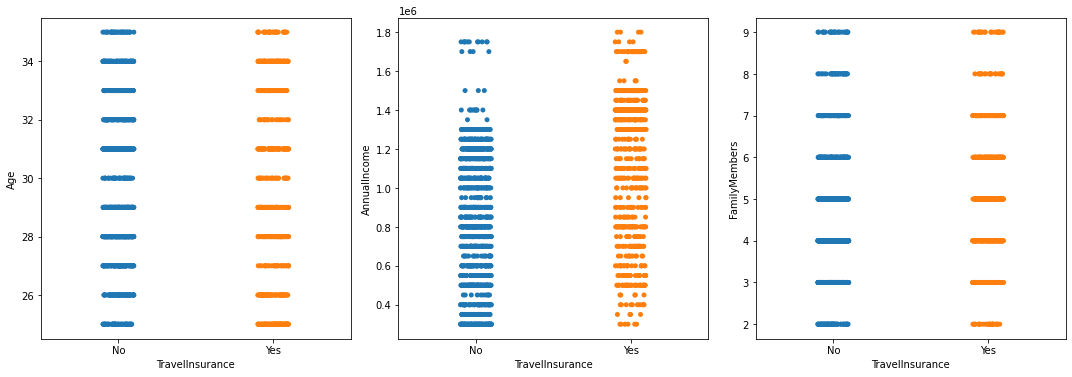

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical)):
  ax = fig.add_subplot(3,3,i+1)
  sns.stripplot(ax=ax, data=df, x='TravelInsurance', y=numerical[i])
  plt.tight_layout()

### Business Insight

In [ ]:
df["TravelInsurance"] = df["TravelInsurance"].map({"No" : 0, "Yes" : 1})
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,0


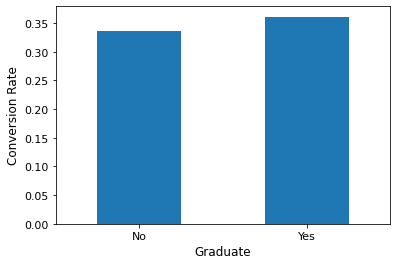

In [ ]:
df.groupby('GraduateOrNot')['TravelInsurance'].mean().plot(kind = 'bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Graduate', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
dfgrad = df.groupby('GraduateOrNot')['TravelInsurance'].mean()
dfgrad

GraduateOrNot
No     0.335593
Yes    0.361111
Name: TravelInsurance, dtype: float64

Pengaruh Pendidikan (Graduate) terhadap conversion rate:

- Pengaruh Pendidikan (Graduate) terhadap conversion rate ini tergolong rendah, dapat dilihat bahwa conversion rate antara Graduate dan Non-Graduate ini terlihat cukup identik dengan Graduate sedikit lebih besar (0.361 & 0.335). Hal ini mungkin terjadi karena Graduate tidak melihat adannya nilai lebih dari pembelian produk Travel Insurance atau tidak begitu memahami benefit yang ada dari produk travel insurance ini.

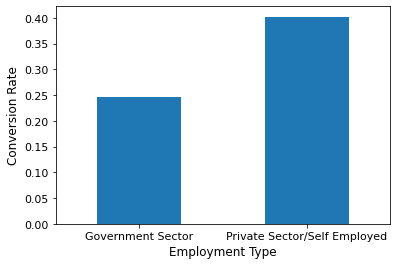

In [ ]:
df.groupby('Employment Type')['TravelInsurance'].mean().plot(kind = 'bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
dfe = df.groupby('Employment Type')['TravelInsurance'].mean()
dfe

Employment Type
Government Sector               0.245614
Private Sector/Self Employed    0.402258
Name: TravelInsurance, dtype: float64

Pengaruh Pekerjaan terhadap conversion rate:

- Dapat dilihat bahwa Conversion rate yang lebih tinggi dalam mengonversi pelanggan dari sektor swasta (0.40) dibandingkan dengan sektor pemerintah (0.24). Hal ini mungkin terjadi karena karyawan di sektor swasta mungkin memiliki kebutuhan yang lebih besar akan asuransi perjalanan, karena sifat pekerjaan atau kebutuhan perjalanan mereka.

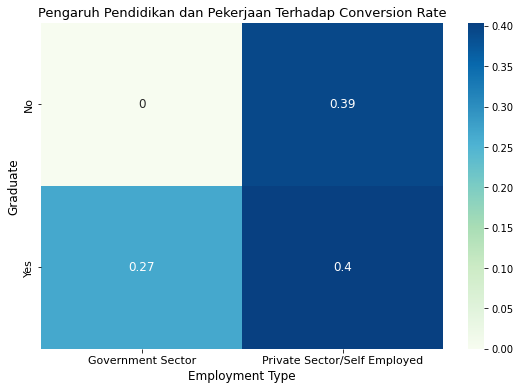

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(pd.pivot_table(df,index="GraduateOrNot",columns="Employment Type",values="TravelInsurance",aggfunc='mean'),annot=True,fmt=".2g",cmap='GnBu',annot_kws={"size": 12})
plt.title('Pengaruh Pendidikan dan Pekerjaan Terhadap Conversion Rate',fontsize=13)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=90, fontsize=11)
plt.ylabel('Graduate', fontsize=12)
plt.xlabel('Employment Type', fontsize=12)

plt.show()

Dari Heatmap diatas dapat dilihat bahwa Graduate yang bekerja di sektor swasta memiliki conversion rate 40% atau 1.48x lebih besar dibandingkan graduate yang bekerja di sektor pemerintahan. Ini menandakan bahwa pekerjaan di sektor swasta sangat membutuhkan asuransi perjalanan, baik bagi Graduate atau Non-Graduate.

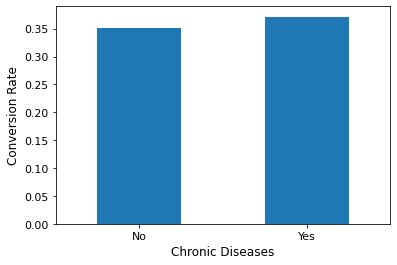

In [ ]:
df.groupby('ChronicDiseases')['TravelInsurance'].mean().plot(kind = 'bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Chronic Diseases', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
dfcd = df.groupby('ChronicDiseases')['TravelInsurance'].mean()
dfcd

ChronicDiseases
No     0.351916
Yes    0.371377
Name: TravelInsurance, dtype: float64

Pengaruh Chronic Diseases terhadap conversion rate:

- Pengaruh Chronic Diseases terhadap conversion rate ini tergolong rendah dan memiliki pola yang sama dengan pengaruh pendidikan (Graduate Or Not) terhadap conversion rate, dapat dilihat bahwa conversion rate antara Yes dan No dari Chronic Diseases ini terlihat cukup identik dengan Yes sedikit lebih besar (0.371 & 0.351). Hal ini mungkin terjadi karena Travel Insurance yang ditawarkan tidak begitu relevan terhadap pelaku perjalanan dengan Chronic Diseases seperti perlindungan untuk keadaan darurat medis atau evakuasi.

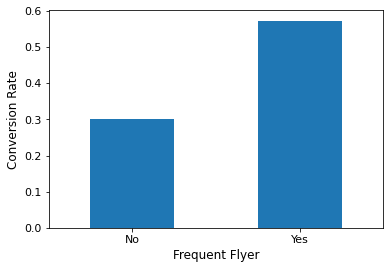

In [ ]:
df.groupby('FrequentFlyer')['TravelInsurance'].mean().plot(kind = 'bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Frequent Flyer', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
dfff = df.groupby('FrequentFlyer')['TravelInsurance'].mean()
dfff

FrequentFlyer
No     0.300000
Yes    0.573141
Name: TravelInsurance, dtype: float64

Pengaruh Frequent Flyers memiliki conversion rate yang tinggi, dimana Yes: 0.57 dan No: 0.3. Hal ini dapat terjadi karena frequent flyer mungkin memiliki kebutuhan atau kebutuhan yang lebih besar akan asuransi perjalanan, karena sifat kebiasaan perjalanan mereka. Selain itu Travel Insurance yang ditawarkan ini mungkin memiliki opsi perlindungan yang sangat relevan dengan frequent flyer, seperti perlindungan untuk multi-perjalanan, perlindungan medis, atau perlindungan untuk penundaan atau pembatalan penerbangan.

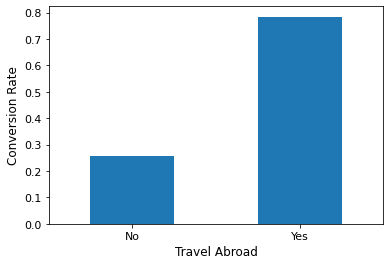

In [ ]:
df.groupby('EverTravelledAbroad')['TravelInsurance'].mean().plot(kind = 'bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Travel Abroad', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
dfta = df.groupby('EverTravelledAbroad')['TravelInsurance'].mean()
dfta

EverTravelledAbroad
No     0.256378
Yes    0.784211
Name: TravelInsurance, dtype: float64

Pengaruh Ever Travelled Abroad memiliki conversion rate yang tinggi, dimana Yes: 0.78 dan No: 0.25. Hal ini dapat terjadi karena pelanggan yang pernah bepergian ke luar negeri mungkin lebih mengetahui potensi risiko dan kesulitan yang terkait dengan perjalanan ke luar negeri. Selain itu Travel Insurance yang ditawarkan ini mungkin memiliki opsi perlindungan yang sangat relevan dengan frequent flyer, seperti perlindungan untuk multi-perjalanan, perlindungan medis, atau perlindungan untuk penundaan atau pembatalan penerbangan.

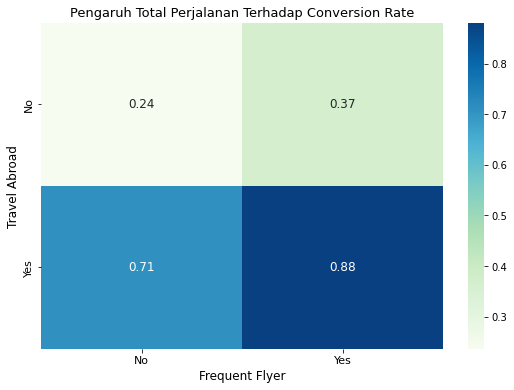

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(pd.pivot_table(df,index="EverTravelledAbroad",columns="FrequentFlyer",values="TravelInsurance",aggfunc='mean'),annot=True,fmt=".2g",cmap='GnBu',annot_kws={"size": 12})
plt.title('Pengaruh Total Perjalanan Terhadap Conversion Rate',fontsize=13)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=90, fontsize=11)
plt.ylabel('Travel Abroad', fontsize=12)
plt.xlabel('Frequent Flyer', fontsize=12)

plt.show()

Dari Heatmap diatas dapat dilihat bahwa Frequent Flyers yang pernah berpergian keluar negeri memiliki conversion rate 88% atau 3.67x lebih besar dibandingkan yang bukan frequent flyer dan tidak pernah pergi keluar negeri. Selain itu, persentase pembelian travel Insurance para pelaku perjalanan yang pernah berpergian ke luar negeri ini juga cukup besar walaupun bukan frequent flyer. Ini menandakan bahwa bagi pelaku perjalanan yang pernah keluar negeri, membeli Travel Insurance merupakan salah satu hal yang penting untuk dilakukan.

In [ ]:
age_cut = []
for x in df["Age"]:
    if x <27 :
        age_cut.append("23-26")
    elif x < 30 :
        age_cut.append("27-29")
    elif x < 33 :
        age_cut.append("30-32")
    else:
        age_cut.append("32+")
df['age_cut'] = age_cut

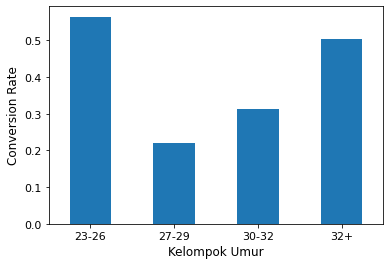

In [ ]:
df.groupby('age_cut')['TravelInsurance'].mean().plot(kind='bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Kelompok Umur', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
df.groupby('age_cut').agg({'TravelInsurance':['mean',len]})

TravelInsurance     
                   mean  len
age_cut                     
23-26          0.564626  294
27-29          0.220748  829
30-32          0.312821  390
32+            0.504219  474

- Umur 23-26 memiliki conversion rate tertinggi, disusul kelompok umur 32+ dengan conversion rate diatas 0.5
- Umur 27-29 memiliki rentang conversion rate paling rendah diantara kelompok umur lainnya.

In [ ]:
income_cut = []
for x in df['AnnualIncome']:
    if x < 500001:
        income_cut.append('0-500000')
    elif x <750001:
        income_cut.append('500000-750000')
    elif x <1000001:
        income_cut.append('750000-1000000')
    elif x <1500001:
        income_cut.append('1000000-1500000')
    else:
        income_cut.append('1500000+')
        
df['income_cut'] = income_cut

In [ ]:
order = ['0-500000', '500000-750000', '750000-1000000', '1000000-1500000', '1500000+']
df.groupby('income_cut').agg({'TravelInsurance':['mean',len]}).loc[order]

TravelInsurance     
                           mean  len
income_cut                          
0-500000               0.163934  366
500000-750000          0.260163  369
750000-1000000         0.263158  361
1000000-1500000        0.496377  828
1500000+               0.761905   63

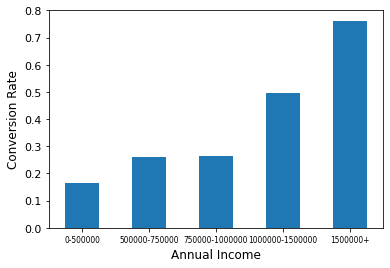

In [ ]:
df.groupby('income_cut')['TravelInsurance'].mean().loc[order].plot(kind='bar')
plt.xticks(rotation=0, fontsize=7.5)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

Conversion rate Akan semakin besar seiring dengan besarnya pendapatan tahunan.

In [ ]:
family_cut = []
for x in df["FamilyMembers"]:
    if x < 3 :
        family_cut.append("1-2")
    elif x <5 :
        family_cut.append("3-4")
    elif x <7 :
        family_cut.append("5-6")
    elif x <9 :
        family_cut.append("7-8")
    else :
        family_cut.append("9+")


df['family_cut'] = family_cut

In [ ]:
orders_fam = ['1-2', '3-4', '5-6', '7-8', '9+']
df.groupby('family_cut').agg({'TravelInsurance':['mean',len]}).loc[orders_fam]

TravelInsurance     
                      mean  len
family_cut                     
1-2               0.290323   93
3-4               0.334467  882
5-6               0.361111  720
7-8               0.430380  237
9+                0.472727   55

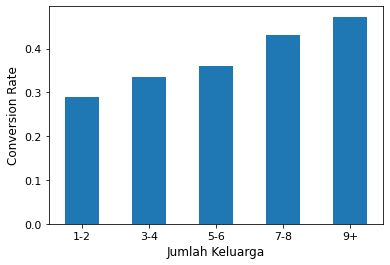

In [ ]:
df.groupby('family_cut')['TravelInsurance'].mean().loc[orders_fam].plot(kind='bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Jumlah Keluarga', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

Conversion rate Akan semakin besar seiring dengan banyaknya jumlah keluarga.

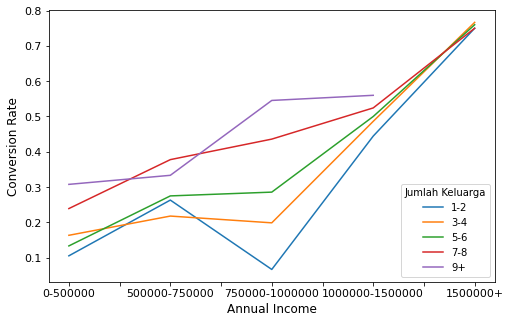

In [ ]:
pd.pivot_table(df,index="income_cut",columns="family_cut",values="TravelInsurance",
               aggfunc='mean').loc[order].plot(figsize=(8,5))
plt.legend(loc='lower right', title='Jumlah Keluarga')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

Secara Umum, tren pembelian Travel Insurance meningkat seiring dengan besarnya pendapatan tahunan di semua kelompok jumlah keluarga dengan titik optimum conversion rate pada annual income 1500000+.

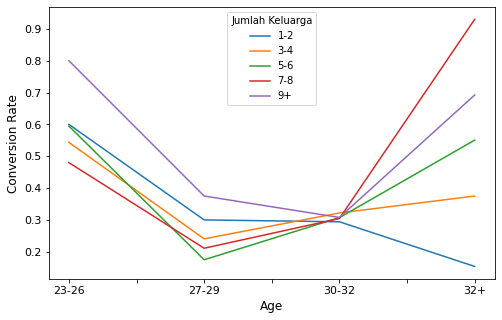

In [ ]:
pd.pivot_table(df,index="age_cut",columns="family_cut",values="TravelInsurance",
               aggfunc='mean').plot(figsize=(8,5))
plt.legend(loc='upper center', title='Jumlah Keluarga')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

Secara Umum, tren pembelian Travel Insurance menurun pada umur 23-26, yang kemudian pada 27-29 akan bergerak naik, terkecuali untuk pelaku perjalanan dengan jumlah keluarga 1-2 orang. Sehingga titik optimumnya ketika pelaku perjalanan berumur 32+.

In [ ]:
df["df_fta"] = df[["FrequentFlyer", "EverTravelledAbroad"]].apply("-".join, axis=1)

<AxesSubplot:xlabel='df_fta', ylabel='TravelInsurance'>

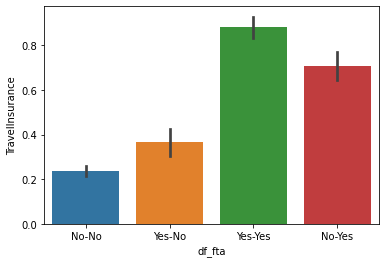

In [ ]:
sns.barplot(x = 'df_fta' ,y = 'TravelInsurance', data=df)

df_fta merupakan penggabungan FrequentFlyer - EverTravelledAbroad.

dari hasil diatas dapat dilihat bahwa customer yang membeli travel insurance kebanyakan merupakan orang yang sering melakukan perjalanan dan pernah melakukan perjalanan ke luar negeri, dan dapat dilihat orang yang pernah melakukan perjalanan ke luar negeri lebih cenderung berpengaruh dalam pembelian travel insurance.

**Rekomendasi Bisnis untuk Perusahaan Tour and Travel:**

Perusahaan dapat memfokuskan pada kategori-kategori dibawah ini untuk menarik klien agar lebih banyak yang tertarik menggunakan paket asuransi baru yang meliputi perlindungan COVID dengan menggunakan strategi yaitu: <br>

1. Perusahaan dapat memfokuskan pada klien yang sering berpergian ke luar kota dengan ketertarikan kebutuhan asuransi paling banyak dibandingkan karakter yang lain. <br>
2. Memfokuskan promosi ke user dengan rentang umur di atas 26 tahun dan yang memiliki riwayat penyakit kronis (chronic disease) serta pernah melakukan perjalanan ke luar negeri (ever travelled abroad). <br>
3. Berdasarkan data historis, di luar karakteristik klien, kedepannya prospecting dapat dilakukan ke calon user yang memiliki annual income di atas 1.3 million dan calon user yang berprofesi di bidang private sector dikarenakan sektor swasta mungkin memiliki kebutuhan yang lebih besar akan asuransi perjalanan, karena sifat pekerjaan atau kebutuhan perjalanan mereka.

## Data Pre-Processing

### Import Library

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Data Cleansing

In [ ]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,age_cut,income_cut,family_cut,df_fta
0,31,Government Sector,Yes,400000,6,Yes,No,No,0,30-32,0-500000,5-6,No-No
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,0,30-32,1000000-1500000,7-8,No-No
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,1,32+,0-500000,3-4,No-No
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,0,27-29,500000-750000,3-4,No-No
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,0,27-29,500000-750000,7-8,Yes-No


#### A. Handle Missing Value

In [ ]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
age_cut                0
income_cut             0
family_cut             0
df_fta                 0
dtype: int64

Data tidak memiliki missing value

#### B. Handle Duplicated Value

In [ ]:
df.duplicated().sum()

738

Data memiki duplikasi namun akan diabaikan karena data tidak memiliki unique ID sehingga tidak dapat dipastikan apakah data tersebut adalah duplikasi atau tidak

#### C. Handle Outliers

In [ ]:
num = df.select_dtypes(include=[np.number]) 
cat = df.select_dtypes(exclude=[np.number])

numerical = num.columns
categorical = cat.columns

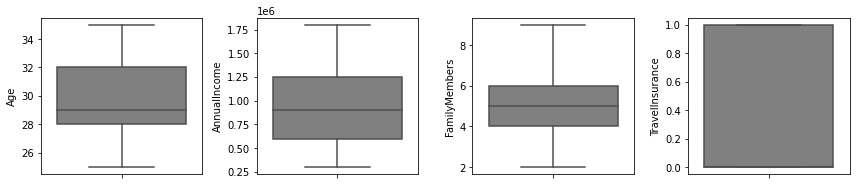

In [ ]:
features = numerical
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(2, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='gray')
    plt.tight_layout()

Terlihat seluruh fitur tidak memiliki outlier sehingga tidak perlu melakukan *outlier handling*

#### D. Feature Transformation

In [ ]:
df['AnnualIncome_norm']= MinMaxScaler().fit_transform(df['AnnualIncome'].values.reshape(len(df),1))
df['FamilyMembers_norm']= MinMaxScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df),1))
df['Age_norm']= MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df),1))
df.describe()

,Age,AnnualIncome,FamilyMembers,TravelInsurance,AnnualIncome_norm,FamilyMembers_norm,Age_norm
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.357323,0.421842,0.393271,0.465023
std,2.913308,3.768557e+05,1.609650,0.479332,0.251237,0.229950,0.291331
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.200000,0.285714,0.300000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.400000,0.428571,0.400000
75%,32.000000,1.250000e+06,6.000000,1.000000,0.633333,0.571429,0.700000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


#### E. Feature Encoding

Feature Encoding dilakukan terhadapat feature catergorical agar menjadi feature numeric, dalam dataframe ini yaitu features 'Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad', dan 'ChronicDiseases'.

Yes : 1 , No : 0

In [ ]:
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})
df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes': 1, 'No': 0})
df['ChronicDiseases'] = df['ChronicDiseases'].map({'Yes': 1, 'No': 0})

Government Sector : 1, Private Sector/Self Employed : 0

In [ ]:
df["Employment Type"] = df["Employment Type"].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})

Menggunakan Label Encoding karena distinct value dari data diatas = 2

#### F. Handle Class Imbalance

In [ ]:
df.stb.freq(['TravelInsurance'], cum_cols=False)

,TravelInsurance,count,percent
0,0,1277,64.26774
1,1,710,35.73226


Dilihat dari persentase data diatas kami tidak memerlukan class imbalance handling.

### Feature Engineering 

#### A. Feature Selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1987 non-null   int64  
 1   Employment Type      1987 non-null   int64  
 2   GraduateOrNot        1987 non-null   int64  
 3   AnnualIncome         1987 non-null   int64  
 4   FamilyMembers        1987 non-null   int64  
 5   ChronicDiseases      1987 non-null   int64  
 6   FrequentFlyer        1987 non-null   int64  
 7   EverTravelledAbroad  1987 non-null   int64  
 8   TravelInsurance      1987 non-null   int64  
 9   age_cut              1987 non-null   object 
 10  income_cut           1987 non-null   object 
 11  family_cut           1987 non-null   object 
 12  df_fta               1987 non-null   object 
 13  AnnualIncome_norm    1987 non-null   float64
 14  FamilyMembers_norm   1987 non-null   float64
 15  Age_norm             1987 non-null   f

In [ ]:
df.reset_index()
df = df[['Age_norm','Employment Type','GraduateOrNot','FamilyMembers_norm','ChronicDiseases','FrequentFlyer','EverTravelledAbroad','AnnualIncome_norm','TravelInsurance']]
df.sample(5)

,Age_norm,Employment Type,GraduateOrNot,FamilyMembers_norm,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,AnnualIncome_norm,TravelInsurance
1807,0.1,0,1,0.142857,0,0,0,0.200000,0
1257,0.3,0,0,0.428571,0,0,0,0.166667,0
426,0.0,0,1,0.428571,0,0,0,0.133333,0
720,0.2,1,1,0.000000,0,0,1,0.366667,0
1837,0.9,0,1,0.428571,0,0,1,0.666667,0


Semua feature relevan untuk modelling, selection pada feature yang sudah di normalisasi (AnnualIncome, FamilyMembers & Age)

#### B. Feature Extraction

Semua nilai feauture sudah sederhana sehingga tidak perlu melakukan feature extraction

#### C. Additional Feature

**C. Additional Feature**


*   "InsuranceType"

> 1. Essential = 100% coverage up to $50,000

> 2. Deluxe = 100% coverage up to $100,0000

> 3. Plus = 100% coverage up to $150,0000

*   "TripLength"

> 1. Less than 7 days

> 2. Up to 14 days

> 3. more than 14 days



*   "Destination"

> 1. Asia

> 2. Europe

> 3. Africa

> 4. North America

> 5. South America

> 6. Antarctica

> 7. Australia

> 8. Domestic

*   Covid Vaccinated Dosage 1 (Yes/No)

*   Covid Vaccinated Dosage 2 (Yes/No)

*   Covid Vaccinated Dosage 3 (Yes/No)

*   Airline (Garuda, Air Asia, Qatar Airways, Singapore Airline, etc)

## Machine Learning Model

### Import Library

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Preparation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, log_loss
import shap

### Data Split

In [ ]:
df.head()

,Age_norm,Employment Type,GraduateOrNot,FamilyMembers_norm,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,AnnualIncome_norm,TravelInsurance
0,0.6,1,1,0.571429,1,0,0,0.066667,0
1,0.6,0,1,0.714286,0,0,0,0.633333,0
2,0.9,0,1,0.285714,1,0,0,0.133333,1
3,0.3,0,1,0.142857,1,0,0,0.266667,0
4,0.3,0,1,0.857143,1,1,0,0.266667,0


In [ ]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age_norm             1987 non-null   float64
 1   Employment Type      1987 non-null   int64  
 2   GraduateOrNot        1987 non-null   int64  
 3   FamilyMembers_norm   1987 non-null   float64
 4   ChronicDiseases      1987 non-null   int64  
 5   FrequentFlyer        1987 non-null   int64  
 6   EverTravelledAbroad  1987 non-null   int64  
 7   AnnualIncome_norm    1987 non-null   float64
 8   TravelInsurance      1987 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 139.8 KB


In [ ]:
#df = df.drop_duplicates(subset = ['Age_norm','Employment Type','GraduateOrNot','AnnualIncome_norm','FamilyMembers_norm','ChronicDiseases','FrequentFlyer','EverTravelledAbroad',"TravelInsurance"])
df.shape

(1987, 9)

In [ ]:
#df['Employment Type']=df['Employment Type'].map({'Private Sector/Self Employed':1,'Government Sector':0})
#df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
#df['FrequentFlyer']=df['FrequentFlyer'].map({'No':0,'Yes':1})
#df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'No':0,'Yes':1})
df.head()

,Age_norm,Employment Type,GraduateOrNot,FamilyMembers_norm,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,AnnualIncome_norm,TravelInsurance
0,0.6,1,1,0.571429,1,0,0,0.066667,0
1,0.6,0,1,0.714286,0,0,0,0.633333,0
2,0.9,0,1,0.285714,1,0,0,0.133333,1
3,0.3,0,1,0.142857,1,0,0,0.266667,0
4,0.3,0,1,0.857143,1,1,0,0.266667,0


In [ ]:
ft = [ 'Age_norm', 'Employment Type', 'GraduateOrNot', 'AnnualIncome_norm','FamilyMembers_norm', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']
x = df[ft]
y = df.TravelInsurance

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x, y, test_size=0.2, random_state=42) #split data

In [ ]:
print("train_x size : ",train_x.size)
print("test_x size  : ",test_x.size)
print("train_y size : ",train_y.size)
print("test_y size  : ",test_y.size)

train_x size :  12712
test_x size  :  3184
train_y size :  1589
test_y size  :  398


In [ ]:
test_x.shape

(398, 8)

In [ ]:
test_y.value_counts()

0    257
1    141
Name: TravelInsurance, dtype: int64

In [ ]:
pd.DataFrame(train_y)

,TravelInsurance
1271,1
1805,0
365,1
1007,1
1232,0
...,...
1130,0
1294,0
860,0
1459,1


In [ ]:
print(pd.Series(train_y).value_counts())

0    1020
1     569
Name: TravelInsurance, dtype: int64


### Oversampling Data Split dengan SMOTE

In [ ]:
X_train_over, y_train_over = SMOTE().fit_resample(train_x, train_y)

In [ ]:
# Sebelum Oversampling
print('Target sebelum oversampling:')
print(pd.Series(train_y).value_counts())

Target sebelum oversampling:
0    1020
1     569
Name: TravelInsurance, dtype: int64


In [ ]:
# Setelah Oversampling
print('Target setelah oversampling:')
print(pd.Series(y_train_over).value_counts())

Target setelah oversampling:
1    1020
0    1020
Name: TravelInsurance, dtype: int64


In [ ]:
y_train_over

0       1
1       0
2       1
3       1
4       0
       ..
2035    1
2036    1
2037    1
2038    1
2039    1
Name: TravelInsurance, Length: 2040, dtype: int64

In [ ]:
X_train_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age_norm             2040 non-null   float64
 1   Employment Type      2040 non-null   int64  
 2   GraduateOrNot        2040 non-null   int64  
 3   AnnualIncome_norm    2040 non-null   float64
 4   FamilyMembers_norm   2040 non-null   float64
 5   ChronicDiseases      2040 non-null   int64  
 6   FrequentFlyer        2040 non-null   int64  
 7   EverTravelledAbroad  2040 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 127.6 KB


### ML Supervised Model

In [ ]:
#model evaluation classification test (default)
def eval_classification(model):
    y_pred = model.predict(test_x)
    y_pred_train = model.predict(train_x)
    y_pred_proba = model.predict_proba(test_x)
    y_pred_proba_train = model.predict_proba(train_x)
    
    print("Accuracy (Test Set): %.3f" % accuracy_score(test_y, y_pred))
    print("Accuracy (Train Set): %.3f" % accuracy_score(train_y, y_pred_train))
    
    print("Precision (Test Set): %.3f" % precision_score(test_y, y_pred))
    print("Precision (Train Set): %.3f" % precision_score(train_y, y_pred_train))
    
    print("Recall (Test Set): %.3f" % recall_score(test_y, y_pred))
    print("Recall (Train Set): %.3f" % recall_score(train_y, y_pred_train))
    
    print("F1-Score (Test Set): %.3f" % f1_score(test_y, y_pred))
    print("F1-Score (Train Set): %.3f" % f1_score(train_y, y_pred_train))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(test_y, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(train_y, y_pred_proba_train[:, 1]))

    score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

    
def cnf_test(model):# Membuat Confusion Matrix (Test)
    y_pred = model.predict(test_x)
    y_pred_train = model.predict(train_x)
    y_pred_proba = model.predict_proba(test_x)
    y_pred_proba_train = model.predict_proba(train_x)
    cnf_matrix = confusion_matrix(test_y, y_pred)
    print(classification_report(test_y, y_pred))
    sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
    plt.title('Confusion Matrix (Test)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

def cnf_train(model):# Membuat Confusion Matrix (Test)
    y_pred = model.predict(test_x)
    y_pred_train = model.predict(train_x)
    y_pred_proba = model.predict_proba(test_x)
    y_pred_proba_train = model.predict_proba(train_x)
    cnf_matrix = confusion_matrix(train_y, y_pred_train)
    print(classification_report(train_y, y_pred_train))
    sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
    plt.title('Confusion Matrix (Train)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
def eval_classification1(model):
    y_pred = model.predict(test_x)
    y_pred_train = model.predict(train_x)
    y_pred_proba = model.predict_proba(test_x)
    y_pred_proba_train = model.predict_proba(train_x)
    
    
    acc_test = accuracy_score(test_y, y_pred)
    precision_test = precision_score(test_y, y_pred)
    recall_test = recall_score(test_y, y_pred)
    f1_test = f1_score(test_y, y_pred)
    roc_auc_train = roc_auc_score(train_y, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(test_y, y_pred_proba[:, 1])
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    # print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(), 4)))
    # print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(), 4)))
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

def show_feature_importance1(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter1(model):
    print(model.best_estimator_.get_params())

In [ ]:
# Modelling for Selected Algorithms

# Selected Models
models1 = ['Logistic Regression', 'Decision Tree', 'AdaBoost Classifier', 'XGB Classifier', 'Random Forest Classifier']
algorithms1 = [LogisticRegression, DecisionTreeClassifier, AdaBoostClassifier, XGBClassifier, RandomForestClassifier]

# List of results:
acc_test_ni = []
precision_test_ni = []
recall_test_ni = []
f1_test_ni = []
roc_auc_train_ni = []
roc_auc_test_ni = []
roc_auc_crossval_train_ni = []
roc_auc_crossval_test_ni = []

In [ ]:
# Evaluating All Models Using Unhandled CLass Imbalance Data
i = 0
random_seed = [DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier]

for model_type in algorithms1:
    # Fitting and using the algorithms
    if model_type in random_seed:
        model = model_type(random_state=42)
    model = model_type(random_state=42)
    model.fit(train_x, train_y)
    print(models1[i])
    result = eval_classification1(model)
    
    # Adding the results to the list
    acc_test_ni.append(result['Test Accuracy'])
    precision_test_ni.append(result['Test Precision'])
    recall_test_ni.append(result['Test Recall'])
    f1_test_ni.append(result['Test F1'])
    roc_auc_train_ni.append(result['Train ROC AUC'])
    roc_auc_test_ni.append(result['Test ROC AUC'])
    roc_auc_crossval_train_ni.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test_ni.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
Decision Tree
AdaBoost Classifier
XGB Classifier
Random Forest Classifier


In [ ]:
result_df = pd.DataFrame(list(zip(models1, acc_test_ni, precision_test_ni, recall_test_ni, f1_test_ni, roc_auc_train_ni, roc_auc_test_ni, roc_auc_crossval_train_ni, roc_auc_crossval_test_ni)), columns=['Algorithms', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])

#### All Basic Algorithm Result

In [ ]:
result_df

,Algorithms,Test Accuracy,Test Precision,Test Recall,Test F1,Train ROC AUC,Test ROC AUC,Crossval Train ROC AUC,Crossval Test ROC AUC
0,Logistic Regression,0.766332,0.772727,0.482270,0.593886,0.774256,0.736457,0.7668,0.7633
1,Decision Tree,0.809045,0.773109,0.652482,0.707692,0.983817,0.758010,0.9830,0.7528
2,AdaBoost Classifier,0.834171,0.987013,0.539007,0.697248,0.811290,0.807227,0.8174,0.7938
3,XGB Classifier,0.844221,0.987654,0.567376,0.720721,0.869974,0.797514,0.8775,0.8043
4,Random Forest Classifier,0.816583,0.798246,0.645390,0.713725,0.980696,0.786158,0.9797,0.7908


##### Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state = 42)#, class_weight='balanced')
logreg.fit(train_x, train_y)
eval_classification(logreg)

Accuracy (Test Set): 0.766
Accuracy (Train Set): 0.775
Precision (Test Set): 0.773
Precision (Train Set): 0.801
Recall (Test Set): 0.482
Recall (Train Set): 0.494
F1-Score (Test Set): 0.594
F1-Score (Train Set): 0.611
roc_auc (test-proba): 0.74
roc_auc (train-proba): 0.77
roc_auc (crossval train): 0.7668423654238096
roc_auc (crossval test): 0.7633281120546809


              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1020
           1       0.80      0.49      0.61       569

    accuracy                           0.77      1589
   macro avg       0.78      0.71      0.73      1589
weighted avg       0.78      0.77      0.76      1589



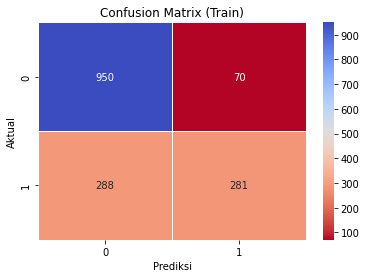

In [ ]:
cnf_train(logreg)

              precision    recall  f1-score   support

           0       0.76      0.92      0.84       257
           1       0.77      0.48      0.59       141

    accuracy                           0.77       398
   macro avg       0.77      0.70      0.71       398
weighted avg       0.77      0.77      0.75       398



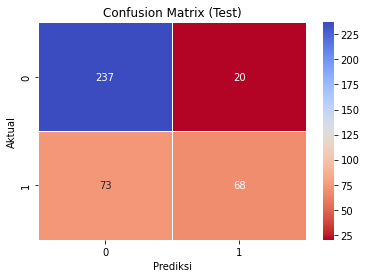

In [ ]:
cnf_test(logreg)

##### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_x, train_y)
eval_classification(dt)

Accuracy (Test Set): 0.809
Accuracy (Train Set): 0.923
Precision (Test Set): 0.773
Precision (Train Set): 0.967
Recall (Test Set): 0.652
Recall (Train Set): 0.812
F1-Score (Test Set): 0.708
F1-Score (Train Set): 0.883
roc_auc (test-proba): 0.76
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.983027382898548
roc_auc (crossval test): 0.7528470855771886


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1020
           1       0.97      0.81      0.88       569

    accuracy                           0.92      1589
   macro avg       0.94      0.90      0.91      1589
weighted avg       0.93      0.92      0.92      1589



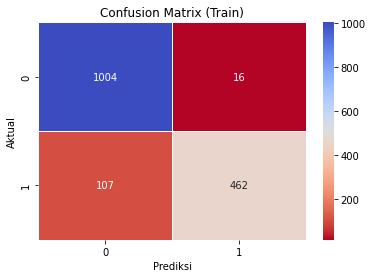

In [ ]:
cnf_train(dt)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       257
           1       0.77      0.65      0.71       141

    accuracy                           0.81       398
   macro avg       0.80      0.77      0.78       398
weighted avg       0.81      0.81      0.80       398



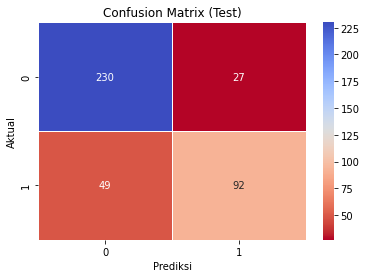

In [ ]:
cnf_test(dt)

##### AdaBoost

In [ ]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(train_x, train_y)
eval_classification(ada)

Accuracy (Test Set): 0.834
Accuracy (Train Set): 0.818
Precision (Test Set): 0.987
Precision (Train Set): 0.907
Recall (Test Set): 0.539
Recall (Train Set): 0.548
F1-Score (Test Set): 0.697
F1-Score (Train Set): 0.683
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.81
roc_auc (crossval train): 0.8173731871054052
roc_auc (crossval test): 0.7937613595173986


              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1020
           1       0.91      0.55      0.68       569

    accuracy                           0.82      1589
   macro avg       0.85      0.76      0.78      1589
weighted avg       0.83      0.82      0.80      1589



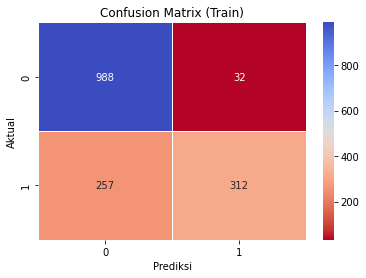

In [ ]:
cnf_train(ada)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       257
           1       0.99      0.54      0.70       141

    accuracy                           0.83       398
   macro avg       0.89      0.77      0.79       398
weighted avg       0.86      0.83      0.82       398



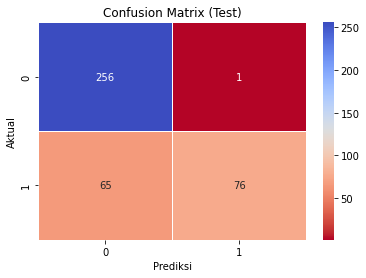

In [ ]:
cnf_test(ada)

##### XGBoost

In [ ]:
xg = XGBClassifier(random_state=42)
xg.fit(train_x, train_y)
eval_classification(xg)

Accuracy (Test Set): 0.844
Accuracy (Train Set): 0.834
Precision (Test Set): 0.988
Precision (Train Set): 0.911
Recall (Test Set): 0.567
Recall (Train Set): 0.596
F1-Score (Test Set): 0.721
F1-Score (Train Set): 0.721
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.87
roc_auc (crossval train): 0.8775021342820855
roc_auc (crossval test): 0.8042882232118199


              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1020
           1       0.91      0.60      0.72       569

    accuracy                           0.83      1589
   macro avg       0.86      0.78      0.80      1589
weighted avg       0.85      0.83      0.82      1589



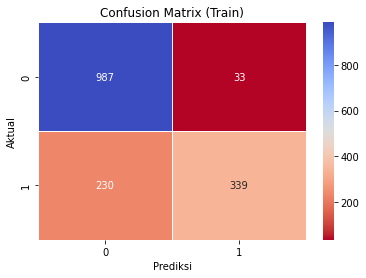

In [ ]:
cnf_train(xg)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1020
           1       0.91      0.60      0.72       569

    accuracy                           0.83      1589
   macro avg       0.86      0.78      0.80      1589
weighted avg       0.85      0.83      0.82      1589



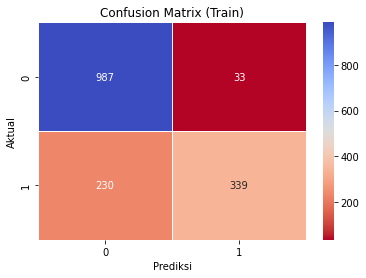

In [ ]:
cnf_train(xg)

##### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_x, train_y)
eval_classification(rf)

Accuracy (Test Set): 0.817
Accuracy (Train Set): 0.923
Precision (Test Set): 0.798
Precision (Train Set): 0.934
Recall (Test Set): 0.645
Recall (Train Set): 0.844
F1-Score (Test Set): 0.714
F1-Score (Train Set): 0.886
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9797131967674453
roc_auc (crossval test): 0.7908168172638773


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1020
           1       0.93      0.84      0.89       569

    accuracy                           0.92      1589
   macro avg       0.93      0.91      0.91      1589
weighted avg       0.92      0.92      0.92      1589



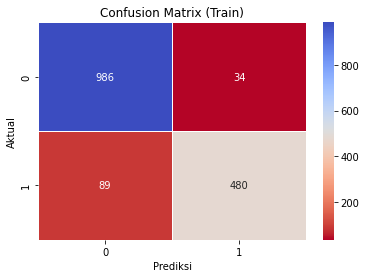

In [ ]:
cnf_train(rf)

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       257
           1       0.80      0.65      0.71       141

    accuracy                           0.82       398
   macro avg       0.81      0.78      0.79       398
weighted avg       0.81      0.82      0.81       398



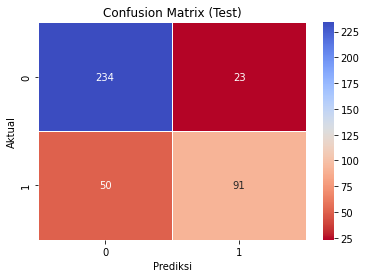

In [ ]:
cnf_test(rf)

#### Model Using SMOTE

In [ ]:
# Modelling for Selected Algorithms

# Selected Models
models2 = ['Logistic Regression', 'Decision Tree', 'AdaBoost Classifier', 'XGB Classifier', 'Random Forest Classifier']
algorithms2 = [LogisticRegression, DecisionTreeClassifier, AdaBoostClassifier, XGBClassifier, RandomForestClassifier]

# List of results:
acc_test_ni = []
precision_test_ni = []
recall_test_ni = []
f1_test_ni = []
roc_auc_train_ni = []
roc_auc_test_ni = []
roc_auc_crossval_train_ni = []
roc_auc_crossval_test_ni = []

In [ ]:
# Evaluating All Models Using SMOTE
i = 0
random_seed = [DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier]

for model_type in algorithms1:
    # Fitting and using the algorithms
    if model_type in random_seed:
        model = model_type(random_state=42)
    model = model_type(random_state=42)
    model.fit(X_train_over, y_train_over)
    print(models2[i])
    result = eval_classification1(model)
    
    # Adding the results to the list
    acc_test_ni.append(result['Test Accuracy'])
    precision_test_ni.append(result['Test Precision'])
    recall_test_ni.append(result['Test Recall'])
    f1_test_ni.append(result['Test F1'])
    roc_auc_train_ni.append(result['Train ROC AUC'])
    roc_auc_test_ni.append(result['Test ROC AUC'])
    roc_auc_crossval_train_ni.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test_ni.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
Decision Tree
AdaBoost Classifier
XGB Classifier
Random Forest Classifier


In [ ]:
result_df1 = pd.DataFrame(list(zip(models2, acc_test_ni, precision_test_ni, recall_test_ni, f1_test_ni, roc_auc_train_ni, roc_auc_test_ni, roc_auc_crossval_train_ni, roc_auc_crossval_test_ni)), columns=['Algorithms', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])

##### All SMOTE Algorithm Result

In [ ]:
result_df1

,Algorithms,Test Accuracy,Test Precision,Test Recall,Test F1,Train ROC AUC,Test ROC AUC,Crossval Train ROC AUC,Crossval Test ROC AUC
0,Logistic Regression,0.726131,0.619403,0.588652,0.603636,0.776008,0.736374,0.7668,0.7633
1,Decision Tree,0.783920,0.706767,0.666667,0.686131,0.983666,0.750145,0.9830,0.7528
2,AdaBoost Classifier,0.816583,0.840000,0.595745,0.697095,0.808950,0.810304,0.8174,0.7938
3,XGB Classifier,0.844221,0.987654,0.567376,0.720721,0.863887,0.809670,0.8775,0.8043
4,Random Forest Classifier,0.804020,0.769231,0.638298,0.697674,0.979642,0.781577,0.9797,0.7908


##### Logistic Regression dengan SMOTE

In [ ]:
lrs = LogisticRegression(random_state = 42)#, class_weight='balanced')
lrs.fit(X_train_over, y_train_over)
eval_classification(lrs)

Accuracy (Test Set): 0.726
Accuracy (Train Set): 0.745
Precision (Test Set): 0.619
Precision (Train Set): 0.647
Recall (Test Set): 0.589
Recall (Train Set): 0.633
F1-Score (Test Set): 0.604
F1-Score (Train Set): 0.640
roc_auc (test-proba): 0.74
roc_auc (train-proba): 0.78
roc_auc (crossval train): 0.7668423654238096
roc_auc (crossval test): 0.7633281120546809


              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1020
           1       0.65      0.63      0.64       569

    accuracy                           0.75      1589
   macro avg       0.72      0.72      0.72      1589
weighted avg       0.74      0.75      0.74      1589



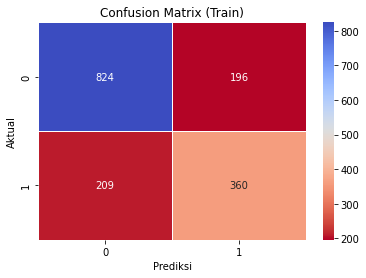

In [ ]:
cnf_train(lrs)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       257
           1       0.62      0.59      0.60       141

    accuracy                           0.73       398
   macro avg       0.70      0.70      0.70       398
weighted avg       0.72      0.73      0.72       398



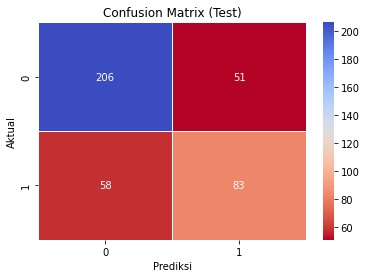

In [ ]:
cnf_test(lrs)

##### Decision Tree dengan SMOTE

In [ ]:
dts = DecisionTreeClassifier(random_state=42)
dts.fit(X_train_over, y_train_over)
eval_classification(dts)

Accuracy (Test Set): 0.784
Accuracy (Train Set): 0.922
Precision (Test Set): 0.707
Precision (Train Set): 0.944
Recall (Test Set): 0.667
Recall (Train Set): 0.831
F1-Score (Test Set): 0.686
F1-Score (Train Set): 0.884
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.983027382898548
roc_auc (crossval test): 0.7528470855771886


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1020
           1       0.94      0.83      0.88       569

    accuracy                           0.92      1589
   macro avg       0.93      0.90      0.91      1589
weighted avg       0.92      0.92      0.92      1589



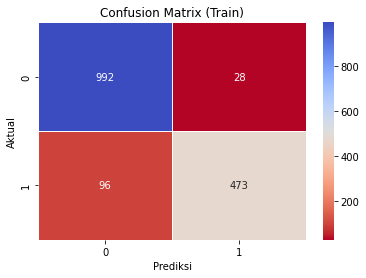

In [ ]:
cnf_train(dts)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       257
           1       0.71      0.67      0.69       141

    accuracy                           0.78       398
   macro avg       0.76      0.76      0.76       398
weighted avg       0.78      0.78      0.78       398



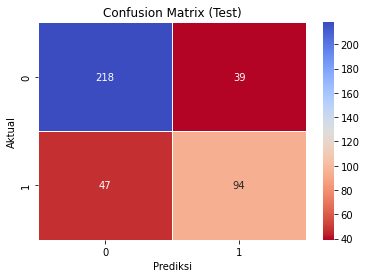

In [ ]:
cnf_test(dts)

##### AdaBoost dengan SMOTE

In [ ]:
adas = AdaBoostClassifier(random_state=42)
adas.fit(X_train_over, y_train_over)
eval_classification(adas)

Accuracy (Test Set): 0.817
Accuracy (Train Set): 0.804
Precision (Test Set): 0.840
Precision (Train Set): 0.792
Recall (Test Set): 0.596
Recall (Train Set): 0.615
F1-Score (Test Set): 0.697
F1-Score (Train Set): 0.692
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.81
roc_auc (crossval train): 0.8173731871054052
roc_auc (crossval test): 0.7937613595173986


              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1020
           1       0.79      0.62      0.69       569

    accuracy                           0.80      1589
   macro avg       0.80      0.76      0.77      1589
weighted avg       0.80      0.80      0.80      1589



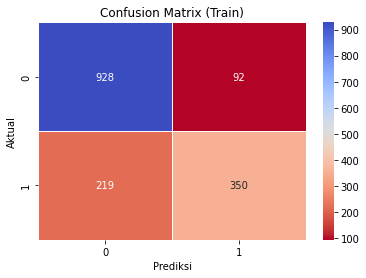

In [ ]:
cnf_train(adas)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       257
           1       0.84      0.60      0.70       141

    accuracy                           0.82       398
   macro avg       0.82      0.77      0.78       398
weighted avg       0.82      0.82      0.81       398



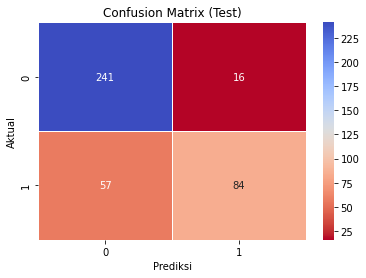

In [ ]:
cnf_test(adas)

##### XGBoost dengan SMOTE

In [ ]:
xgs = XGBClassifier(random_state=42)
xgs.fit(X_train_over, y_train_over)
eval_classification(xgs)

Accuracy (Test Set): 0.844
Accuracy (Train Set): 0.836
Precision (Test Set): 0.988
Precision (Train Set): 0.910
Recall (Test Set): 0.567
Recall (Train Set): 0.601
F1-Score (Test Set): 0.721
F1-Score (Train Set): 0.724
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.86
roc_auc (crossval train): 0.8775021342820855
roc_auc (crossval test): 0.8042882232118199


              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1020
           1       0.91      0.60      0.72       569

    accuracy                           0.84      1589
   macro avg       0.86      0.78      0.80      1589
weighted avg       0.85      0.84      0.83      1589



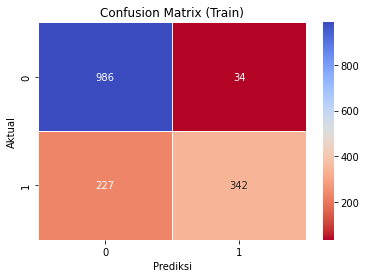

In [ ]:
cnf_train(xgs)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       257
           1       0.99      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.90      0.78      0.81       398
weighted avg       0.87      0.84      0.83       398



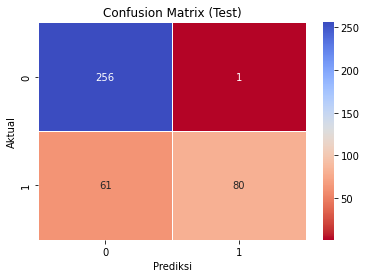

In [ ]:
cnf_test(xgs)

##### Random Forest dengan SMOTE

In [ ]:
rfs = RandomForestClassifier(random_state=42)
rfs.fit(X_train_over, y_train_over)
eval_classification(rfs)

Accuracy (Test Set): 0.804
Accuracy (Train Set): 0.922
Precision (Test Set): 0.769
Precision (Train Set): 0.913
Recall (Test Set): 0.638
Recall (Train Set): 0.865
F1-Score (Test Set): 0.698
F1-Score (Train Set): 0.888
roc_auc (test-proba): 0.78
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9797131967674453
roc_auc (crossval test): 0.7908168172638773


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1020
           1       0.91      0.86      0.89       569

    accuracy                           0.92      1589
   macro avg       0.92      0.91      0.91      1589
weighted avg       0.92      0.92      0.92      1589



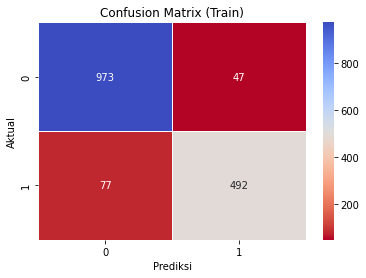

In [ ]:
cnf_train(rfs)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       257
           1       0.77      0.64      0.70       141

    accuracy                           0.80       398
   macro avg       0.79      0.77      0.78       398
weighted avg       0.80      0.80      0.80       398



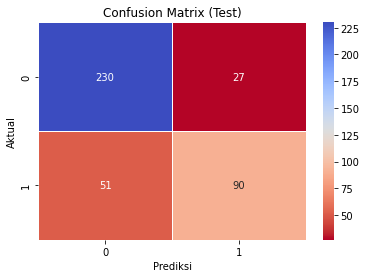

In [ ]:
cnf_test(rfs)

#### Hyperparameter Tuning

##### XGBoost + SMOTE

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, learning_curve
import numpy as np
import matplotlib.pyplot as plt

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xgsa = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xgsa, hyperparameters, cv=5, random_state=42, scoring='f1')
xg_tuned.fit(X_train_over, y_train_over)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.827
Accuracy (Train Set): 0.841
Precision (Test Set): 0.875
Precision (Train Set): 0.867
Recall (Test Set): 0.596
Recall (Train Set): 0.656
F1-Score (Test Set): 0.709
F1-Score (Train Set): 0.747
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.8865404171841185
roc_auc (crossval test): 0.795971384372411


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1020
           1       0.87      0.66      0.75       569

    accuracy                           0.84      1589
   macro avg       0.85      0.80      0.82      1589
weighted avg       0.84      0.84      0.83      1589



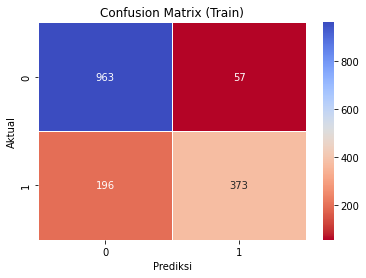

In [ ]:
cnf_train(xg_tuned)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       257
           1       0.88      0.60      0.71       141

    accuracy                           0.83       398
   macro avg       0.84      0.77      0.79       398
weighted avg       0.83      0.83      0.82       398



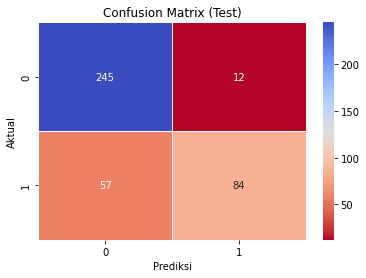

In [ ]:
cnf_test(xg_tuned)

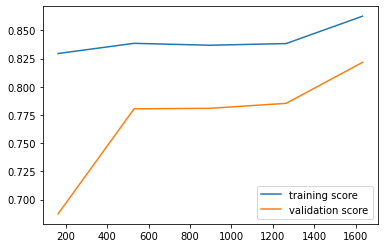

<Figure size 432x288 with 0 Axes>

In [ ]:
# Membuat Learning Curve
train_sizes, train_scores, validation_scores = learning_curve(xg_tuned.best_estimator_, X_train_over, y_train_over, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='training score')
plt.plot(train_sizes, np.mean(validation_scores, axis=1), label='validation score')
plt.legend(loc='best')
plt.show()

# Menyimpan hasil gambar
plt.savefig('learning_curve.png')

### Feature Importance

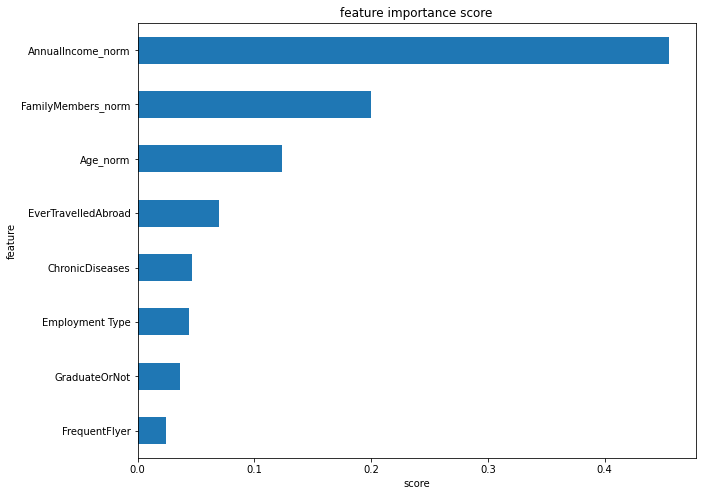

In [ ]:
show_feature_importance(xg)

5 Feature importance tertinggi adalah AnnualIncome, Family Members, Age, Ever Travelled Abroad, Chronic Diseases.

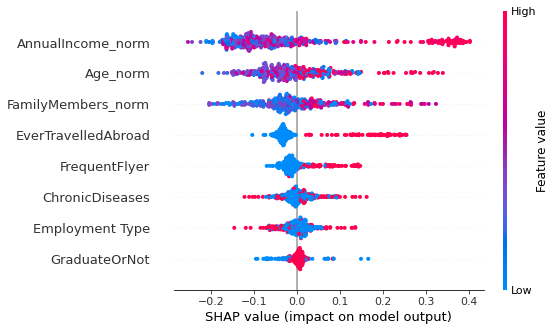

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_x)
shap.summary_plot(shap_values[1], test_x)

### Business Insight

Dari hasil analisa, perusahaan bisa fokus pada pelanggan yang memiliki karakteristik gabungan dari 5 feature importance tertinggi (Age, annual income, ever travelled abroad, Family members, Chronic diseases) agar bisa menarik pelanggan baru yang tepat sasaran.

Dalam hal prospecting, perusahaan bisa memfokuskan penjualan ke calon klien yang sudah berkeluarga serta cenderung memiliki penyakit kronis yang sesuai dengan paket perlindungan asuransi dan pernah berpergian misalnya dengan memberikan promo terkait tiket perjalanan yang lebih murah apabila calon klien membeli paket asuransi travel. Hal tersebut dapat menarik minat pelanggan.
